In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!ls img/

WaldoScene1.jpg WandoScene.jpg  cars3.jpg       people2.jpg
WaldoScene2.png cars1.jpg       chess.jpg       waldo.jpg
WaldoScene3.jpg cars2.jpg       people1.jpg


### Template Matching

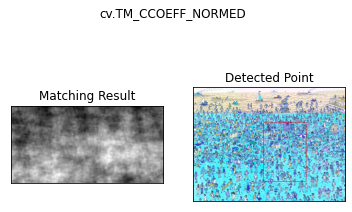

In [18]:
# Load img/WandoScene.jpg  as the main image
img = cv2.imread('img/wandoScene.jpg')
# Load img/waldo.jpg as the template
temp = cv2.imread('img/waldo.jpg')
# Corvert the images to grayscale
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
# Find the template in the image
res = cv2.matchTemplate(img2,template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# Draw a rectagle around the the detected match
w, h = template.shape[::-1]
bottom_right = (max_loc[0] + w, max_loc[1] + h)
cv2.rectangle(img,max_loc, bottom_right, 255, 2)


plt.subplot(121),
plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), 
plt.xticks([]), 
plt.yticks([])
plt.subplot(122),
plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), 
plt.xticks([]), plt.yticks([])
plt.suptitle('cv.TM_CCOEFF_NORMED')
plt.show()

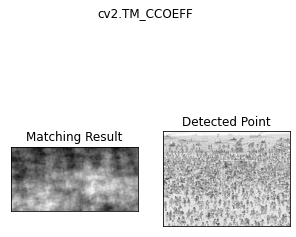

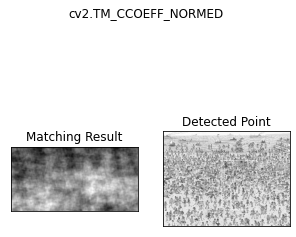

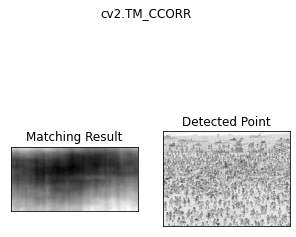

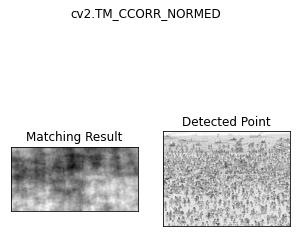

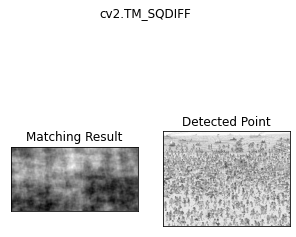

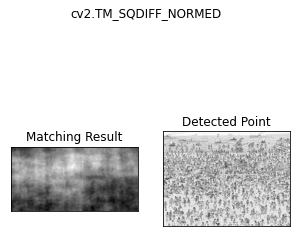

In [24]:
# Try with different waldo scenes
img = cv2.imread('img/wandoScene.jpg',0)
img2 = img.copy()
template = cv2.imread('img/waldo.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(5,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [ ]:
# How well did it work?, did it perform well with other images? 
